In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql import SparkSession

#create session
spark = SparkSession.builder.appName("IPL Data Analysis").getOrCreate()

In [0]:
from pyspark.sql.types import StructField, StructType, IntegerType, StringType, BooleanType, DateType, DecimalType
from pyspark.sql.functions import col, when, sum, avg, row_number
from pyspark.sql.window import Window

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])

In [0]:
ball_by_ball_df = spark.read.schema(ball_by_ball_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project-v1/Ball_By_Ball.csv")

In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])
match_df = spark.read.schema(match_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project-v1/Match.csv")

In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

player_df = spark.read.schema(player_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project-v1/Player.csv")

In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

player_match_df = spark.read.schema(player_match_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project-v1/Player_match.csv")

In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

team_df = spark.read.schema(team_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project-v1/Team.csv")

In [0]:
# Filter to include only valid deliveries (excluding extras like wides and no balls for specific analyses)
ball_by_ball_df = ball_by_ball_df.filter((col('wides') == 0) & (col('noballs') == 0))

# Aggregation: Calculate the total and average runs scored in each match and inning
total_and_avg_runs = ball_by_ball_df.groupBy('match_id', 'innings_no').agg(
    sum('runs_scored').alias('total_runs'),
    avg('runs_scored').alias('average_runs')
)

In [0]:
# Window Function: Calculate running total of runs in each match for each over
windowSpec = Window.partitionBy('match_id', 'innings_no').orderBy('over_id')

ball_by_ball_df = ball_by_ball_df.withColumn(
    'running_total_runs',
    sum('runs_scored').over(windowSpec)
)

In [0]:
# Conditional Column: Flag for high impact balls (either a wicket or more than 6 runs including extras)
ball_by_ball_df = ball_by_ball_df.withColumn(
    'high_impact',
    when((col('runs_scored') + col('extra_runs') > 6) | (col('bowler_wicket') == True), True).otherwise(False)
)

In [0]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|

In [0]:
from pyspark.sql.functions import year, month, dayofmonth, when

# Extracting year, month, and day from the match date for more detailed time-based analysis
match_df = match_df.withColumn('year', year('match_date'))
match_df = match_df.withColumn('month', month('match_date'))
match_df = match_df.withColumn('day', dayofmonth('match_date'))

# High margin win: categorizing win margins into 'high', 'medium', and 'low'
match_df = match_df.withColumn(
    'win_margin_category',
    when(col('win_margin') >= 100, 'High')
    .when((col('win_margin') >= 50) & (col('win_margin') < 100), 'Medium')
    .otherwise('Low')
)

# Analyze the impact of the toss: who wins the toss and the match
match_df = match_df.withColumn(
    'toss_match_winner',
    when(col('toss_winner') == col('match_winner'), 'Yes').otherwise('No')
)

# Show the enhanced match DataFrame
match_df.show(2)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|year|month| day|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|       I

In [0]:
from pyspark.sql.functions import lower, regexp_replace

# Normalize and clean player names
player_df = player_df.withColumn('player_name', lower(regexp_replace('player_name', '[^a-zA-Z0-9 ]', '')))

# Handle missing values in 'batting_hand' and 'bowling_skill' with a default 'unknown'
player_df = player_df.na.fill({'batting_hand':'unknown', 'bowling_skill':'unknown'})

# Categorizing players based on batting hand
player_df = player_df.withColumn(
    'batting_style',
    when(col('batting_hand').contains('left'), 'Left-Handed').otherwise('Right-Handed')
)

# Show the modified player DataFrame
player_df.show(2)


+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|player_sk|player_id|player_name| dob|  batting_hand|   bowling_skill|country_name|batting_style|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|        0|        1|  scganguly|null| Left-hand bat|Right-arm medium|       India| Right-Handed|
|        1|        2| bbmccullum|null|Right-hand bat|Right-arm medium| New Zealand| Right-Handed|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
only showing top 2 rows



In [0]:
from pyspark.sql.functions import col, when, current_date, expr

# Add a 'veteran_status' column based on player age
player_match_df = player_match_df.withColumn(
    'veteran_status',
    when(col('age_as_on_match') >= 35, 'Veteran').otherwise('Non_Veteran')
)

# Dynamic column to calculate years since debut
player_match_df = player_match_df.withColumn(
    'years_since_debut',
    (year(current_date()) - col('season_year'))
)

# Show the enriched DataFrame
player_match_df.show()


+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+-----------------+
|player_match_sk|playermatch_key|match_id|player_id|    player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|years_since_debut|
+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------

In [0]:
ball_by_ball_df.createOrReplaceTempView('ball_by_ball')
match_df.createOrReplaceTempView('match')
player_df.createOrReplaceTempView('player')
player_match_df.createOrReplaceTempView('player_match')
team_df.createOrReplaceTempView('team')

In [0]:
top_scoring_batsmen_per_season = spark.sql("""
select p.player_name,
    m.season_year,
    sum(b.runs_scored) as total_runs
from ball_by_ball as b
    join match as m
        on b.match_id = m.match_id
    join player_match as pm
        on m.match_id = pm.match_id and b.striker = pm.player_id
    join player as p
        on p.player_id = pm.player_id
group by 1, 2
order by 2, 3 desc
""")

In [0]:
top_scoring_batsmen_per_season.show(5)

+------------+-----------+----------+
| player_name|season_year|total_runs|
+------------+-----------+----------+
|     semarsh|       2008|       614|
|    ggambhir|       2008|       532|
|stjayasuriya|       2008|       508|
|    srwatson|       2008|       463|
|     gcsmith|       2008|       437|
+------------+-----------+----------+
only showing top 5 rows



In [0]:
economical_bowlers_powerplay = spark.sql("""
select p.player_name,
    avg(b.runs_scored) as avg_runs_per_ball,
    count(b.bowler_wicket) as total_wickets
from ball_by_ball as b
    join player_match as pm
        on b.match_id = pm.match_id and b.bowler = pm.player_id
    join player as p
        on pm.player_id = p.player_id
where b.over_id <= 6
group by 1
having count(*) >= 1
order by 2, 3 desc
""")
economical_bowlers_powerplay.show()

+-------------+------------------+-------------+
|  player_name| avg_runs_per_ball|total_wickets|
+-------------+------------------+-------------+
|    smharwood|0.3333333333333333|            0|
|    ankitsoni|               0.5|            0|
|     grnapier|               0.5|            0|
|      ajfinch|               0.5|            0|
|       azampa|               0.5|            0|
|    aveshkhan|               0.5|            0|
|      nbsingh|0.5833333333333334|            0|
|    agmurtaza|0.6538461538461539|            0|
|     sbbangar|0.6666666666666666|            0|
|     ddupreez|0.6666666666666666|            0|
|       sgopal|0.6666666666666666|            0|
|    fhedwards|0.6923076923076923|            0|
|      akumble|0.7685185185185185|            0|
|      umargul|0.7777777777777778|            0|
|  kppietersen|0.7777777777777778|            0|
|jsyedmohammad|0.7777777777777778|            0|
|     ssmundhe|0.8333333333333334|            0|
| lacarseldine|0.833

In [0]:
toss_impact_individual_matches = spark.sql("""
select m.match_id, m.toss_winner, m.toss_name, m.match_winner,
    case when m.toss_winner = m.match_winner then 'Won' else "Lost" end as match_outcome
from match as m
where m.toss_name is not null
order by 1
""")
toss_impact_individual_matches.show()

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         Lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          Won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         Lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         Lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         Lost|
|  335992|     Kings XI Punjab|      bat|    Rajasthan Royals|         Lost|
|  335993|     Deccan Chargers|      bat|    Delhi Daredevils|         Lost|
|  335994|      Mumbai Indians|    field| Chennai Super Kings|         Lost|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|          Won|
|  335996|      Mumbai Indians|    field|     Kings XI Punjab|         Lost|

In [0]:
average_runs_in_wins = spark.sql("""
select p.player_name, avg(b.runs_scored) as avg_runs_in_wins, count(*) as innings_played
from ball_by_ball as b
    join player_match as pm
        on b.match_id = pm.match_id and b.striker = pm.player_id
    join player as p
        on pm.player_id = p.player_id
    join match as m
        on pm.match_id = m.match_id
where m.match_winner = pm.player_team
group by 1
order by 2
""")
average_runs_in_wins.show()

+-------------+-------------------+--------------+
|  player_name|   avg_runs_in_wins|innings_played|
+-------------+-------------------+--------------+
|      isharma|                0.0|             1|
|    kpappanna|                0.0|             1|
|     jjbumrah|                0.0|             2|
|       anehra|                0.0|             2|
|      tsmills|                0.0|             3|
|      jtheron|                0.0|             1|
|     snthakur|                0.0|             2|
|      vraaron|                0.0|             5|
| anirudhsingh|                0.0|             1|
|    tthushara|                0.2|             5|
|     saabbott|               0.25|             4|
| yashpalsingh| 0.3157894736842105|            19|
|   kccariappa| 0.3333333333333333|             3|
|   ssreesanth| 0.3333333333333333|             3|
|    jdunadkat|                0.4|             5|
|    smharwood|0.42857142857142855|             7|
|       bkumar|                

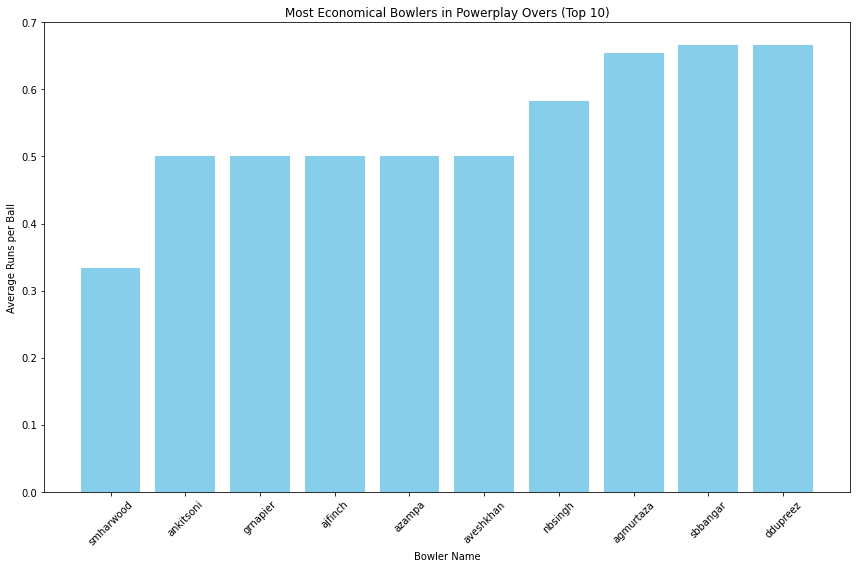

In [0]:
import matplotlib.pyplot as plt

# Assuming 'economical_bowlers_powerplay' is already executed and available as a Spark DataFrame
economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

# Visualizing using Matplotlib
plt.figure(figsize=(12, 8))

# Limiting to top 10 for clarity in the plot
top_economical_bowlers = economical_bowlers_pd.nsmallest(10, 'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color = 'skyblue')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplay Overs (Top 10)')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

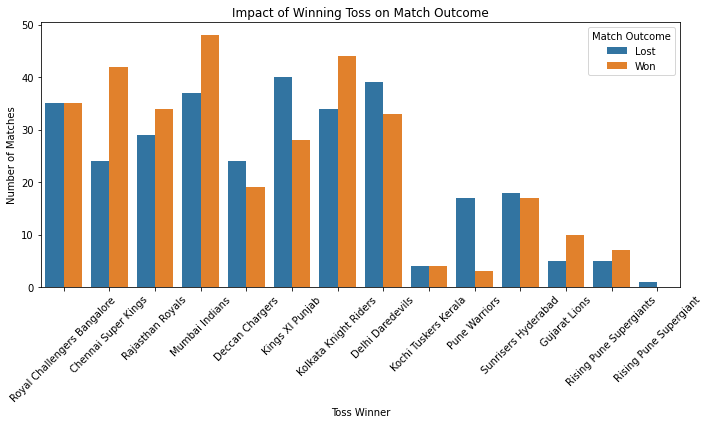

In [0]:
import seaborn as sns

toss_impact_pd = toss_impact_individual_matches.toPandas()

# Creating a countplot to show win/loss after winning toss
plt.figure(figsize=(10, 6))
sns.countplot(x = 'toss_winner', hue='match_outcome', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcome')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title = 'Match Outcome')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

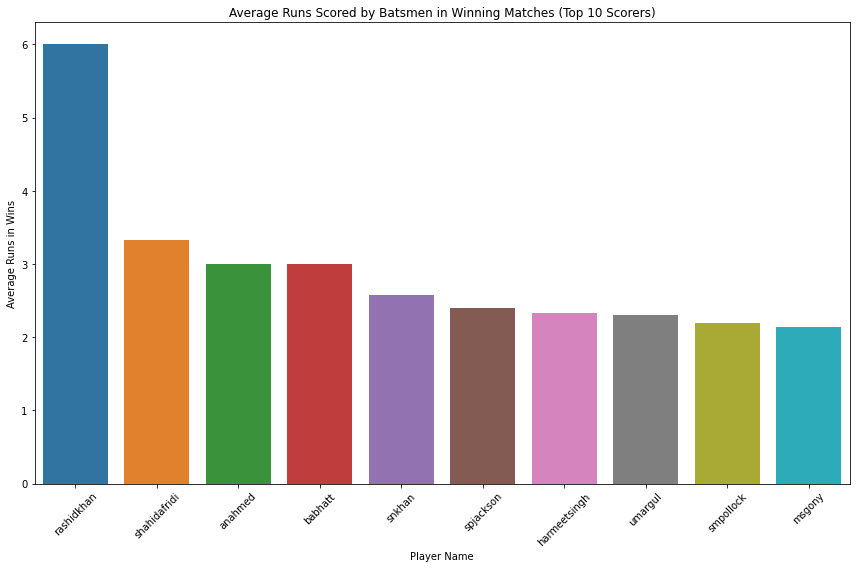

In [0]:
average_runs_pd = average_runs_in_wins.toPandas()

# Using seaborn to plot average runs in winning matches
plt.figure(figsize=(12, 8))
top_scorers = average_runs_pd.nlargest(10, 'avg_runs_in_wins')
sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scorers)
plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10 Scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [0]:
# Execute SQL Query
scores_by_venue = spark.sql("""
select venue_name, avg(total_runs) as average_score, max(total_runs) as highest_score
from(
    select b.match_id, m.venue_name, sum(runs_scored) as total_runs
    from ball_by_ball as b
        join match as m
            on b.match_id = m.match_id
    group by 1, 2
) 
group by 1
order by 2 desc
""")

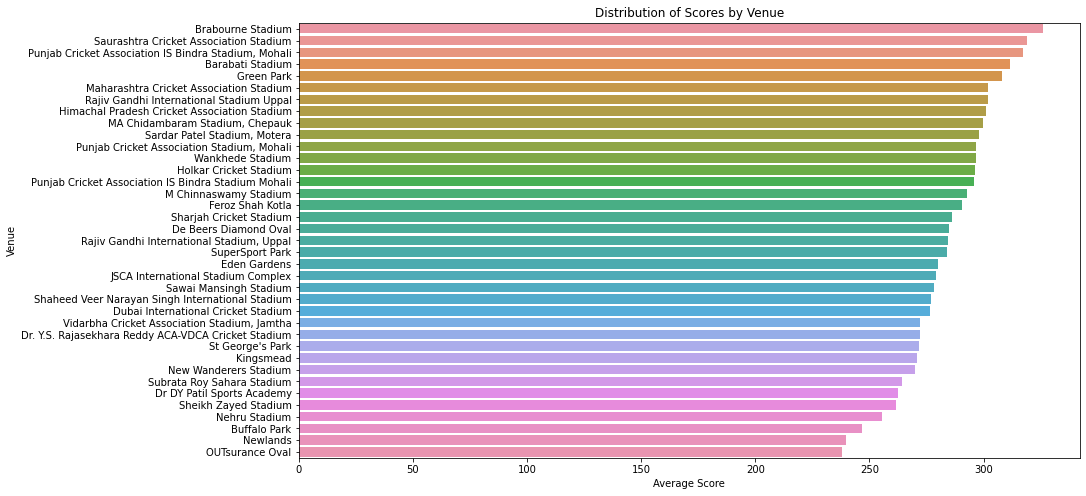

In [0]:
# Convert to Pandas DataFrame
scores_by_venue_pd = scores_by_venue.toPandas()

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='average_score', y='venue_name', data=scores_by_venue_pd)
plt.title('Distribution of Scores by Venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()

In [0]:
# Execute SQL Query
dismissal_types = spark.sql("""
select out_type, count(*) as frequency
from ball_by_ball
where out_type is not null
group by 1
order by 2 desc
""")

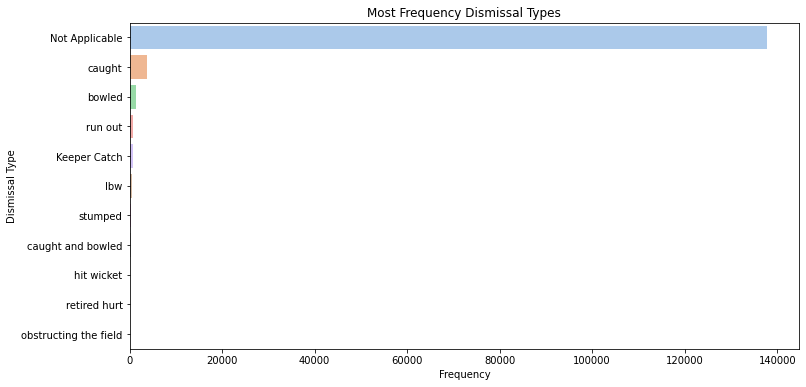

In [0]:
# Convert to Pandas DataFrame
dismissal_types_pd = dismissal_types.toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='out_type', data=dismissal_types_pd, palette='pastel')
plt.title('Most Frequency Dismissal Types')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.show()

In [0]:
# Execute SQL Query
team_toss_win_performance = spark.sql("""
select team1, 
    count(*) as matches_played,
    sum(case when toss_winner = match_winner then 1 else 0 end) as wins_after_toss
from match
where toss_winner = team1
group by 1
order by 3 desc
""")
team_toss_win_performance.show(5)

+--------------------+--------------+---------------+
|               team1|matches_played|wins_after_toss|
+--------------------+--------------+---------------+
| Chennai Super Kings|            37|             27|
|      Mumbai Indians|            42|             26|
|Kolkata Knight Ri...|            36|             24|
|Royal Challengers...|            34|             19|
|    Delhi Daredevils|            36|             17|
+--------------------+--------------+---------------+
only showing top 5 rows



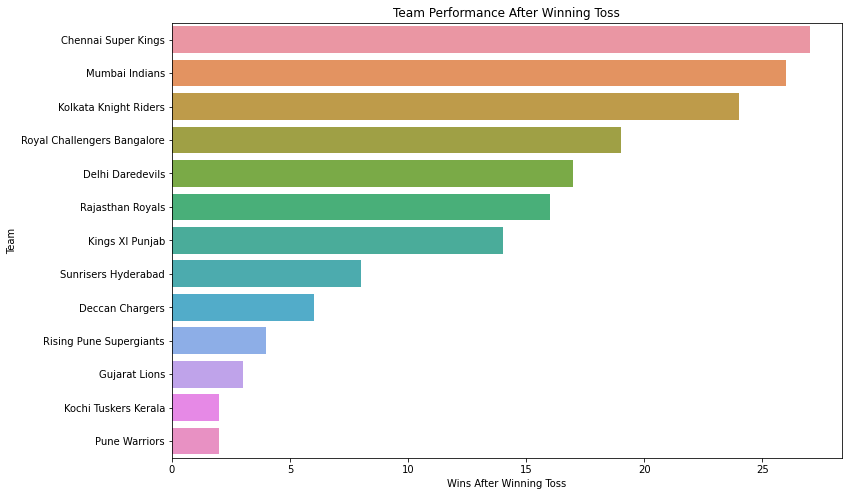

In [0]:
# Convert to Pandas DataFrame
team_toss_win_pd = team_toss_win_performance.toPandas()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='wins_after_toss', y='team1', data=team_toss_win_pd)
plt.title('Team Performance After Winning Toss')
plt.xlabel('Wins After Winning Toss')
plt.ylabel('Team')
plt.show()